<a href="https://colab.research.google.com/github/dsairreddy/Introduction-to-Numpy-/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
# intro to ML

In [ ]:
# Terms in ML
# 1. colloction - data used  for training ,validating & testing ml model

# 2. features - independent variable or input variable used predict the target variable

# 3. target - dependent variable - output - we wAant to predict
#  eg., predicting number of bedrooms

# 4. training data  - subset of dataset used to train the model

# 5. testing data - subset of dataset used to validate the trained model

# 6. model - mathamatical representation of relationship between feature and target

# 7. Supervised Learning - training the data based on  labeled data (outcome) || Model learn from known data / labled data

# 8. Regression - it is a method to predict the contionous values form a model - supervised learning

# 9. overrfitting - when a model learns form traing the data too well, include noise - perform poorly new data

# 10. underfitting - model is too simple doesn't capture the pattren in data

# # categories in ML
# 1. supervised learnig - model learns from labled data input / output data
#   eg., linear regression, decision tree, random forest, svm
# Best usecase so far : house  price prediction based on previous / historical data


# 2. Unsupervised Learning - model finds new pattrens in unlabeled data/labels
# eg., clustring (k mean), PCA
# use case : customer segmentatiom in marketing


# 3. Reinforcement Learning - model learns by interacting with eenvironment & receive the rewards or penalities
#    deep learning, AlphaGO,...
#     use case : self driving vechices, self learnig AI bots, SLAM
#

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# generating a random dataset
np.random.seed(42) # used to set saame sequence of values from random package
numSample = 100

size = np.random.randint(800,5000,numSample) # creating numSample 100 sample from (800 - 5000)
bedroom = np.random.randint(1,6, numSample)
washroom = np.random.randint(1,6, numSample)
locality_score = np.random.randint(1,10, numSample)

# Genarating house prices with randomness
housePrice = (size*3000)+(bedroom* 5000) + (washroom*30000)+ (locality_score*10000) + np.random.randint(-5000,5000,numSample)

# creting dataFrame
df = pd.DataFrame({
    'size': size,
    'bedroom': bedroom,
    'washroom': washroom,
    'locality_score': locality_score,
    'Price': housePrice
})
df





,size,bedroom,washroom,locality_score,Price
0,1660,5,2,6,5125387
1,4572,4,2,7,13869002
2,3892,5,3,7,11861536
3,1266,5,4,3,3971913
4,4244,3,2,2,12823066
...,...,...,...,...,...
95,1006,1,2,3,3113293
96,2284,3,2,1,6933191
97,1663,4,1,1,5050313
98,3590,1,1,3,10836938


In [ ]:
 # train the ml model - linear regression
 # paackage installation
 #pip install scikit learn

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['size','bedroom','washroom','locality_score']]
y = df['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # "train_test_split" will split the data into 2
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [31]:
# step 3- evaluate the model
# package requirements
# sklearn.metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(x_test) # f(x)=y

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 2017.1241662664804
MSE: 6166094.835890881
RMSE: 2483.1622653163204


In [35]:
# 4. make a prediction
newHouse = np.array([[4000,10,10,10]])
PredictHouse_price = model.predict(newHouse)
print(f"Predicted House Price: {PredictHouse_price}")

Predicted House Price: [12448708.16851761]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
PredictHouse_price[0]
# making prediction

12448708.168517606

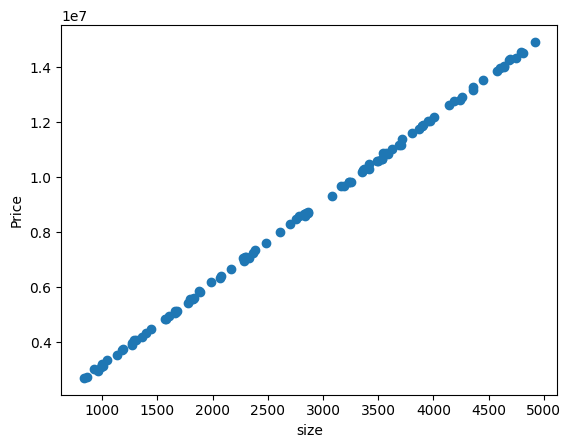

In [37]:
plt.scatter(df['size'],df['Price'])
plt.xlabel('size')
plt.ylabel('Price')
plt.show()

<ipython-input-42-50cdef9c5f79>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


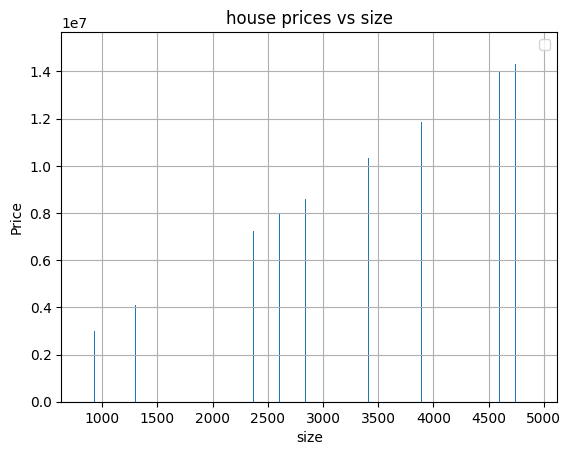

In [42]:
plt.bar(df['size'],df['Price'])
plt.xlabel('size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.title('house prices vs size')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


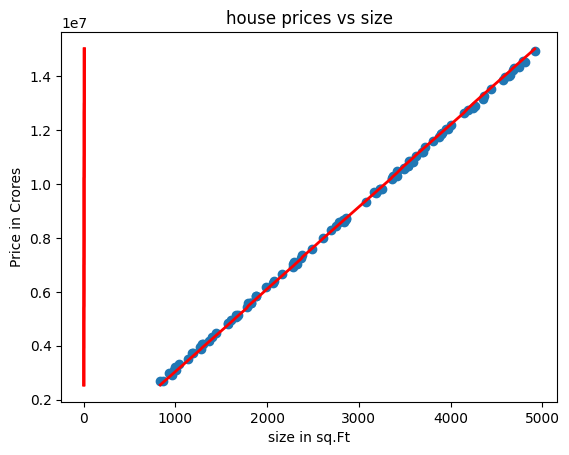

In [46]:
Xsorted = np.sort(x,axis=0)
y_pred = model.predict(Xsorted)
plt.scatter(df['size'],df['Price'])
plt.plot(Xsorted,y_pred, color = 'red', linewidth = 2)
plt.xlabel('size in sq.Ft')
plt.ylabel('Price in Crores')
plt.title('house prices vs size')
plt.show()